In [1]:
"""
Allow some options on the plots (zoom, resize, save),
/!\: have to wait to the end of the cell's execution
before launch the next
"""
%matplotlib notebook

# standard plot inside the netbook, but no options available
# %matplotlib inline

from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join, exists, basename
from scipy.io import wavfile
import pickle
import json
from pprint import pprint
from IPython.display import Audio, display, Markdown
import warnings
import sys
import pandas

import birdsonganalysis as bsa

# utils module from current folder
from utils import (boari_synth_song_error, draw_learning_curve,
                   carac_to_calculate_err_of_synth, err_per_feat)
from cmp_2_sim import plot_gesture_starts

# Allow to import the modules in the model folder
sys.path.append('../model/')
from measures import normalize_and_center, bsa_measure
from song_fitter import SongModel, get_scores
import synth

sns.set_palette('colorblind')

fig_width = 10 # full screen: 16 / half screen: 10
fig_height = 5

In [2]:
# path of the folder with the results
path = '../model/res/'

# -- 1 simulation --
# path += 'seed2+mutate_best_models_elite+512_neg_beta_no_pitch+default_coef_0p+500_diversity_th'

# -- Cluster simulations --
path += 'nlm_div_th_test_180713_173751/'

# -- Definition of each parameter --
# params = []
# params.append("seed0")
# params.append("mutate_best_models_elite")
# params.append("rescal_meas_512")
# params.append("default_coef")
# path += '+'.join(params)

# -- All parameters are defined at the same time --
param_name = "seed3+nlm_div_th_test+0p_1rms+2000_diversity_th"
path += param_name

if exists(join(path, 'aborted.txt')):
    warnings.warn('Aborted run')
if not exists(join(path, 'data.pkl')):
    warnings.warn('Run is not finished')

In [3]:
# load the parameters used for the simulation
with open(join(path, 'conf.json'), 'r') as f:
    run_param = json.load(f)
    
try:
    with open(join(path, 'desc.md'), 'r') as f:
        display(Markdown( '> ' + '\n> '.join(f.read().split("\n"))))
except FileNotFoundError:
    print('No desc for this run.')

No desc for this run.


# Get data

In [4]:
# -- Tutor --
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
tutor = normalize_and_center(tutor)

# -- Songs learned --
outputs = []

try:
    with open(join(path, 'data.pkl'), 'rb') as f:
        songlog = pickle.load(f)
except FileNotFoundError:
    try:
        warnings.warn('Learning not over')
        with open(join(path, 'data_cur.pkl'), 'rb') as f:
            songlog = pickle.load(f)
    except FileNotFoundError:
        print("Error: no data files")
    
root_data = [item[1] for item in songlog if item[0] == 'root']
rd = pandas.DataFrame(root_data)

day_index = -1 # -1: last day

best = np.argmin(rd['scores'].iloc[day_index])
smodels = rd['songs'].iloc[day_index]
sm = smodels[best]
ab = sm.gen_alphabeta()
song = sm.gen_sound()

g_starts = []
for i, gesture in enumerate(sm.gestures):
            g_starts.append(gesture[0])

# Allow to split the gesture on the alpha and beta plots
for start, g in sm.gestures:
    ab[start] = np.nan

In [5]:
print(g_starts)

[0, 866, 1027, 1223, 1407, 1572, 1715, 1855, 1956, 2069, 2349, 2710, 3298, 3582, 3720, 4680, 4991, 5153, 5295, 5723, 6485, 7701, 8804, 9203, 9474, 9649, 9972, 10558, 10658, 12157, 12306, 13040, 13221, 14084, 14225]


In [6]:
print(len(tutor))
print(len(ab))
print(len(song))

19014
19014
19014


len(syll_ab) = 19014
len(syll_wav) = 19014
min_pos = 5395
max_pos = 6385
cur_pos = 5723
new_pos =  5886.7109285178985
int(new_pos) =  5886
reduction en avant
len(mut_ab) = 19014
len(mut_wav) = 19014


<IPython.core.display.Javascript object>


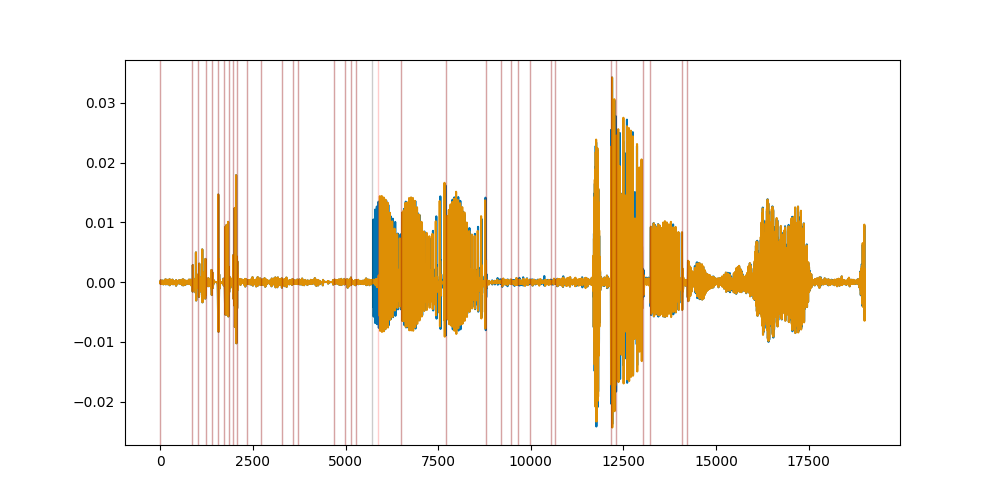

<IPython.core.display.Javascript object>


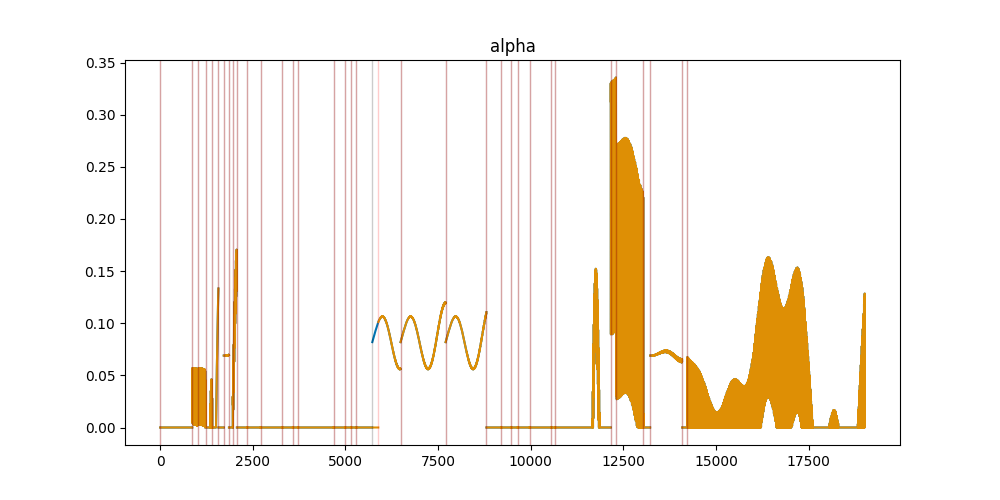

<IPython.core.display.Javascript object>


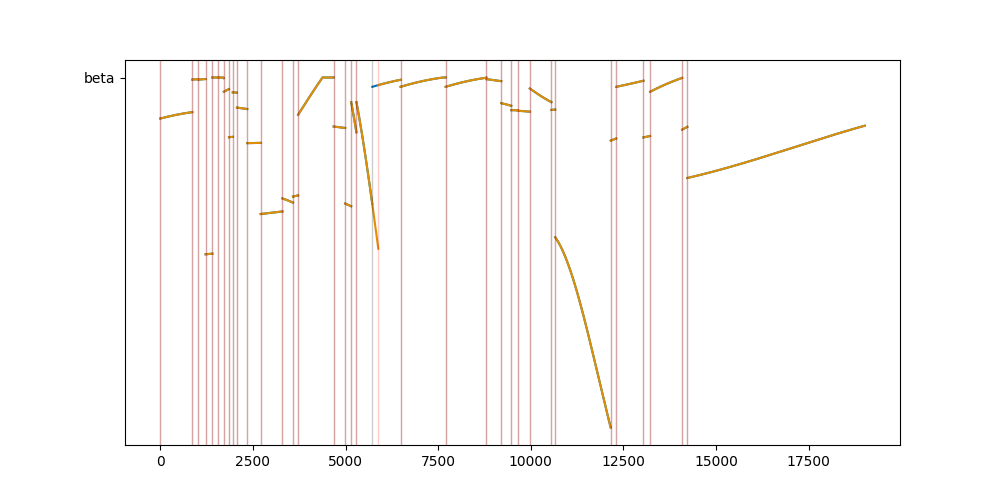

In [54]:
syll_ab = sm.gen_alphabeta(pad=False)
syll_wav = sm.gen_sound()

print("len(syll_ab) =", len(syll_ab))
print("len(syll_wav) =", len(syll_wav))

mut = sm.mutate_test()

mut_ab = mut.gen_alphabeta(pad=False)
mut_wav = mut.gen_sound()

print("len(mut_ab) =", len(mut_ab))
print("len(mut_wav) =", len(mut_wav))

syll_starts = []
mut_starts = []
sm_loc_g = []
mut_loc_g = []

for i in range(len(sm.gestures)):
    syll_starts.append(sm.gestures[i][0])
    mut_starts.append(mut.gestures[i][0])
    syll_ab[sm.gestures[i][0]] = np.nan
    mut_ab[mut.gestures[i][0]] = np.nan

plt.figure(figsize=(fig_width, fig_height))
plt.plot(syll_wav)
plt.plot(mut_wav)
plot_gesture_starts(syll_starts)
plot_gesture_starts(mut_starts, color='r')
plt.show()

plt.figure(figsize=(fig_width, fig_height))
plt.plot(syll_ab[:,0])
plt.plot(mut_ab[:,0])
plot_gesture_starts(syll_starts)
plot_gesture_starts(mut_starts, color='r')
plt.title("alpha")
plt.show()

plt.figure(figsize=(fig_width, fig_height))
plt.plot(syll_ab[:,1])
plt.plot(mut_ab[:,1])
plot_gesture_starts(syll_starts)
plot_gesture_starts(mut_starts, color='r')
plt.plot("beta")
plt.show()